# NLP - Twitter Sentiment Analysis Project

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np

Loading Data 

In [2]:
df_train_rawdata = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY4\sentimentanalysisdata.csv')

df_test_rawdata = pd.read_csv(r'C:\Users\nkhg\Desktop\AIML\30 Projects\DAY4\test_tweets.csv')


In [3]:
print(df_train_rawdata.shape)
df_train_rawdata.head()

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
print(df_test_rawdata.shape)
df_test_rawdata.head()

(17197, 2)


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


Test Data set contains 2 Columns
1. id : index
2. tweet : has tweets writen by users whaich are to be classified.

Training Data Set Information

In [5]:
df_train_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Testing Data Set Information

In [6]:
df_test_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


Both the Tweet columns in train and test has unstructured data. 
    
Combining both the data sets and removing punctuation,numbers,stopwords etc.


In [7]:
#Combining both data sets
df_Combined = df_train_rawdata.append(df_test_rawdata, ignore_index = True, sort = False)
df_Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49159 entries, 0 to 49158
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49159 non-null  int64  
 1   label   31962 non-null  float64
 2   tweet   49159 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ MB


# Data processing & cleaning

Step A : Converting html entities

In [8]:
# Importing HTMLParser
from html.parser import HTMLParser
html_parser =  HTMLParser()
# creating a new column (clean tweets) and appending the cleaned version 
df_Combined['clean tweets'] = df_Combined['tweet'].apply(lambda x: html_parser.unescape(x))
df_Combined.tail()

<ipython-input-8-499fc17ad0ec>:5: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  df_Combined['clean tweets'] = df_Combined['tweet'].apply(lambda x: html_parser.unescape(x))


,id,label,tweet,clean tweets
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) & u...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


Step B : Removing "@user" from all the tweets

In [9]:
import re
# Funtion remove_pattern to remove the @user tags
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

# Function Call to remove twitter handles (@user)

df_Combined['clean tweets'] = np.vectorize(remove_pattern)(df_Combined['clean tweets'], "@[\w]*")
df_Combined.tail()

,id,label,tweet,clean tweets
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) & u...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


Step C : Changing all the tweets into lowercase

In [10]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: x.lower()) # lambda lower takes no arguments
df_Combined.tail()

,id,label,tweet,clean tweets
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) & u...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


Step D : Apostrophe Lookup

In [11]:
# creating a dictionary with Apostrophe
apostrophe_dict = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [12]:
#Function (lookup_dict) to remove dictonary items
def lookup_dict(text, dictionary):
    for word in text.split():
        if word.lower() in dictionary:
            if word.lower() in text.split():
                text = text.replace(word, dictionary[word.lower()])
    return text

df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: lookup_dict(x,apostrophe_dict))
df_Combined.head()

,id,label,tweet,clean tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i cannot use cause t...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


Step E : Short Word Lookup

In [13]:
# short words dictonary 

short_word_dict = {
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great"
}

In [14]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: lookup_dict(x,short_word_dict))
df_Combined.tail()

,id,label,tweet,clean tweets
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) & u...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


Step F : Emoticon Lookup

In [15]:
# Emotican Dictonary 

emoticon_dict = {
":)": "happy",
":‑)": "happy",
":-]": "happy",
":-3": "happy",
":->": "happy",
"8-)": "happy",
":-}": "happy",
":o)": "happy",
":c)": "happy",
":^)": "happy",
"=]": "happy",
"=)": "happy",
"<3": "happy",
":-(": "sad",
":(": "sad",
":c": "sad",
":<": "sad",
":[": "sad",
">:[": "sad",
":{": "sad",
">:(": "sad",
":-c": "sad",
":-< ": "sad",
":-[": "sad",
":-||": "sad"
}

In [16]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: lookup_dict(x,emoticon_dict))
df_Combined.tail(10)

,id,label,tweet,clean tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,loving lifeðºð¸âï¸ð #createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style...","black professor demonizes, proposes nazi style..."
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think positive. #positive #ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...","we love the pretty, happy and fresh you! #teen..."
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today in #ohio((omg)) & u...
49157,49158,NaN,"happy, at work conference: right mindset leads...","happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...","my song ""so glad"" free download! #shoegaze ..."


Step G : Replacing Punctuations with space

In [17]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))
df_Combined.tail(10)

,id,label,tweet,clean tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,loving lifeð ºð â ï ð createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think positive positive ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",we love the pretty happy and fresh you teen...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2_damn_tuff ruff_muff__techno_city ng005 web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid ð hairflip neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg u...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze ...


Step H : Replacing Special Characters with space

In [18]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))
df_Combined.tail(10)

,id,label,tweet,clean tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,loving life createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think positive positive ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",we love the pretty happy and fresh you teen...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,2 damn tuff ruff muff techno city ng005 web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid hairflip neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg u...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze ...


Step I : Replacing Numbers (integers) with space

In [19]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
df_Combined.tail(10)

,id,label,tweet,clean tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,loving life createyourfutu...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demonizes proposes nazi style...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think positive positive ins...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",we love the pretty happy and fresh you teen...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,damn tuff ruff muff techno city ng web...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like a mermaid hairflip neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg u...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze ...


Step J : Removing words whom length is 1

In [20]:
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(lambda x:  ' '.join([w for w in x.split() if len(w)>1]))
df_Combined['clean tweets'][0:10]

0    when father is dysfunctional and is so selfish...
1    thanks for lyft credit cannot use cause they d...
2                                  bihday your majesty
3    model love you take with you all the time in your
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
6                               camping tomorrow danny
7    the next school year is the year for exams can...
8    we won love the land allin cavs champions clev...
9                   welcome here am it has it is so gr
Name: clean tweets, dtype: object

In [21]:
!pip install textblob 

from textblob import TextBlob

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nkhg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Spelling correction is a cool feature which TextBlob offers, we can be accessed using the correct function as shown below.

# shows the closest match for the error word with the closest probabality score
blob.words[6].spellcheck()

# The Command will take a huge amount of time as the code needs to run through every row. Hence Limiting the run to first 10 rows as an example

Importing stop words from NLTK coupus and word tokenizer

In [23]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
# token created for clean tweets column 
df_Combined['clean tweets'] = df_Combined['clean tweets'].apply(str)
df_Combined['tweet token'] = df_Combined['clean tweets'].apply(lambda x: word_tokenize(x))

In [25]:
df_Combined['tweet token'].tail()

49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, hairflip, neverready,...
49156    [hillary, campaigned, today, in, ohio, omg, us...
49157    [happy, at, work, conference, right, mindset, ...
49158    [my, song, so, glad, free, download, shoegaze,...
Name: tweet token, dtype: object

In [26]:
# Removing Stop words
stop_words = set(stopwords.words('english'))
df_Combined['tweet token filtered'] = df_Combined['tweet token'].apply(lambda x: [word for word in x if not word in stop_words])
df_Combined[['tweet token filtered','tweet token']].tail()

,tweet token filtered,tweet token
49154,"[thought, factory, left, right, polarisation, ...","[thought, factory, left, right, polarisation, ..."
49155,"[feeling, like, mermaid, hairflip, neverready,...","[feeling, like, mermaid, hairflip, neverready,..."
49156,"[hillary, campaigned, today, ohio, omg, used, ...","[hillary, campaigned, today, in, ohio, omg, us..."
49157,"[happy, work, conference, right, mindset, lead...","[happy, at, work, conference, right, mindset, ..."
49158,"[song, glad, free, download, shoegaze, newmusi...","[my, song, so, glad, free, download, shoegaze,..."


Adding 2 More Colums with the below methods
1. Stemming
2. Lemmatization

The difference between stemming and lemmatization is, 

lemmatization considers the context and converts the word to its meaningful base form,

stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

In [27]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizing = WordNetLemmatizer()

In [28]:
df_Combined['tweet stemmed'] = df_Combined['tweet token filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
df_Combined['tweet lemmatized'] = df_Combined['tweet token filtered'].apply(lambda x: ' '.join([lemmatizing.lemmatize(i) for i in x]))

Final DATAFRAME with all the Data Cleaning Completed 

In [29]:
df_Combined.tail()

,id,label,tweet,clean tweets,tweet token,tweet token filtered,tweet stemmed,tweet lemmatized
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation trump ...,"[thought, factory, left, right, polarisation, ...","[thought, factory, left, right, polarisation, ...",thought factori left right polaris trump usele...,thought factory left right polarisation trump ...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid hairflip neverready forma...,"[feeling, like, mermaid, hairflip, neverready,...","[feeling, like, mermaid, hairflip, neverready,...",feel like mermaid hairflip neverreadi formal w...,feeling like mermaid hairflip neverready forma...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohio omg used word...,"[hillary, campaigned, today, in, ohio, omg, us...","[hillary, campaigned, today, ohio, omg, used, ...",hillari campaign today ohio omg use word like ...,hillary campaigned today ohio omg used word li...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...",happi work confer right mindset lead cultur de...,happy work conference right mindset lead cultu...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download shoegaze newmusi...,"[my, song, so, glad, free, download, shoegaze,...","[song, glad, free, download, shoegaze, newmusi...",song glad free download shoegaz newmus newsong,song glad free download shoegaze newmusic newsong


# TEXT ANALYSIS

Text Analysis is done "tweet stemmed" & "tweet lematized" columns.

A - Will see the most commonly used words for both the columns i.e. "tweet_stemmed" & "tweet_lematized"

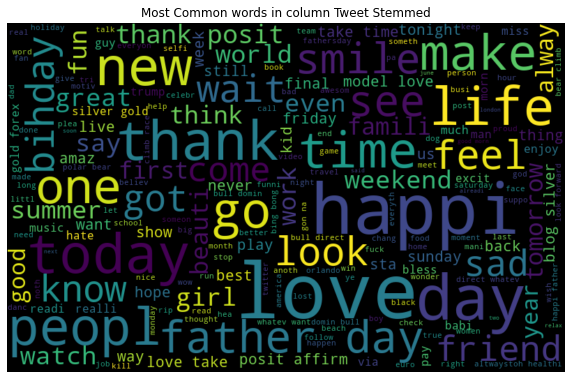

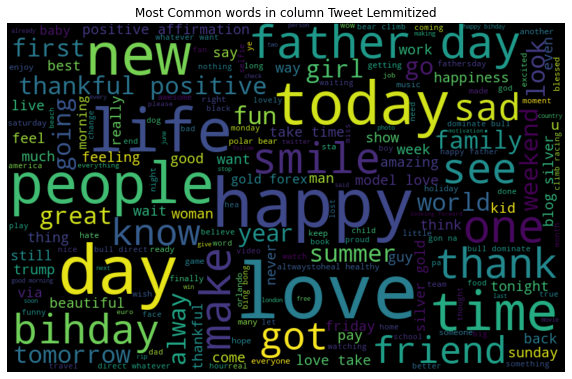

In [30]:
# Importing dependencies
import matplotlib.pyplot as plt

# For Stemmed words
all_words = ' '.join([text for text in df_Combined['tweet stemmed']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

#For Lemmitized Words

all_words = ' '.join([text for text in df_Combined['tweet lemmatized']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Lemmitized")
plt.show()

B -Most common words in non racist/sexist tweets

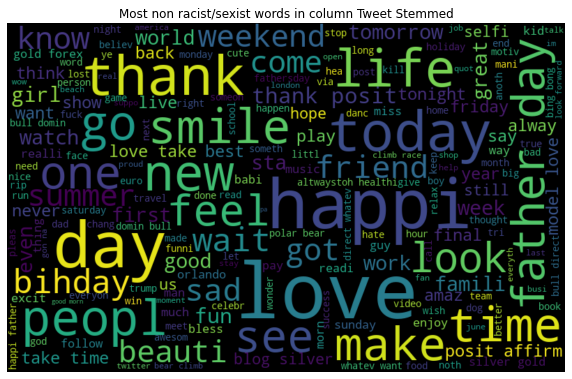

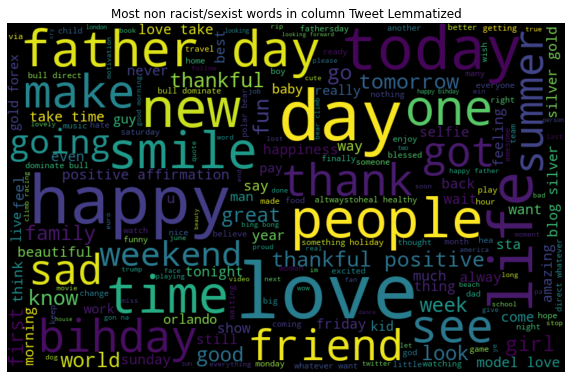

In [31]:
non_racist_sexist_tweets =' '.join([text for text in df_Combined['tweet stemmed'][df_Combined['label'] == 0]])

# For Stemmed Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_racist_sexist_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Stemmed")
plt.show()

non_racist_sexist_tweets =' '.join([text for text in df_Combined['tweet lemmatized'][df_Combined['label'] == 0]])

# For Lemmatized Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_racist_sexist_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most non racist/sexist words in column Tweet Lemmatized")
plt.show()

C -Most common words in racist/sexist tweets

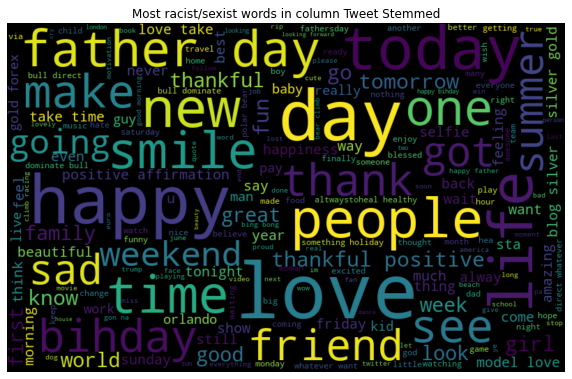

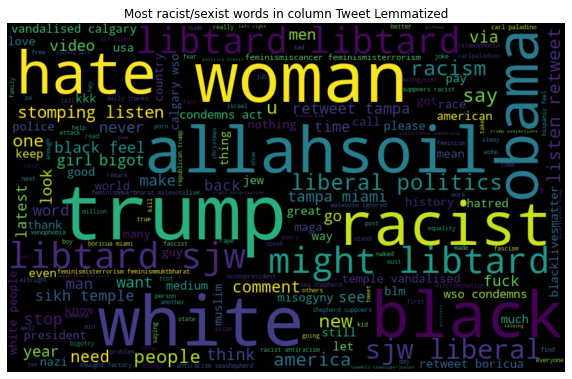

In [32]:
racist_sexist_tweets =' '.join([text for text in df_Combined['tweet stemmed'][df_Combined['label'] == 1]])

# For Stemmed Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(non_racist_sexist_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Stemmed")
plt.show()

racist_sexist_tweets =' '.join([text for text in df_Combined['tweet lemmatized'][df_Combined['label'] == 1]])

# For Lemmatized Tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(racist_sexist_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most racist/sexist words in column Tweet Lemmatized")
plt.show()

# Cleaned Tweets Features Extraction

A - Bag of Words Features

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bag_of_words

CountVectorizer(max_df=0.9, max_features=1000, min_df=2, stop_words='english')

A.1 - Bag of Words Feature matrix - For columns 'tweet stemmed'

In [34]:
bag_of_words_stemmed = bag_of_words.fit_transform(df_Combined['tweet stemmed'])

A.2 - Bag of Words Feature matrix - For columns 'tweet lemmatized'

In [35]:
bag_of_words_lemmatized = bag_of_words.fit_transform(df_Combined['tweet lemmatized'])

B - TF-IDF Features

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
TfidfVectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

B.1 - TF-IDF feature matrix - For columns 'tweet stemmed'

In [37]:
TF_IDF_stemmed = TfidfVectorizer.fit_transform(df_Combined['tweet stemmed'])

B.2 - TF-IDF feature matrix - For columns 'tweet lemmatized'

In [38]:
TF_IDF_lemmatized = TfidfVectorizer.fit_transform(df_Combined['tweet lemmatized'])

# MODELLING

Logistic Regression Model Building: Twitter Sentiment Analysis

In [39]:
# Importing Dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

A - Building model using Bag-of-Words features

A.1 - For columns 'tweet stemmed'

In [40]:
# Splitting the data set to train (with labels) and test (without label)
train_bag_of_words = bag_of_words_stemmed[:31962,:]
test_bag_of_words = bag_of_words_stemmed[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bag_of_words, df_train_rawdata['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

0.5550952775476387


A.2 - For columns 'tweet_lemmatized'

In [41]:
train_bag_of_words2 = bag_of_words_lemmatized[:31962,:]
test_bag_of_words2 = bag_of_words_lemmatized[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bag_of_words2, df_train_rawdata['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

A2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(A1)

0.5550952775476387


B - Building model using TF-IDF features

B.1 - For columns 'tweet stemmed'

In [42]:
train_tfidf = TF_IDF_stemmed[:31962,:]
test_tfidf = TF_IDF_stemmed[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B1 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B1)

0.5444933920704845


B.2 - For columns 'tweet_lemmatized'

In [43]:
train_tfidf = TF_IDF_lemmatized[:31962,:]
test_tfidf = TF_IDF_lemmatized[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

B2 = f1_score(yvalid, prediction_int) # calculating f1 score
print(B2)

0.5388046387154327


In [44]:
print("F1 - Score Chart")
print("* F1-Score - Model using Bag-of-Words features")
print("   F1-Score = ",A1," - For column tweets are stemmed")
print("   F1-Score = ",A2," - For column tweets are Lemmatized")
print("* F1-Score - Model using TF-IDF features")
print("   F1-Score = ",B1," - For column tweets are stemmed")
print("   F1-Score = ",B2," - For column tweets are Lemmatized")

F1 - Score Chart
* F1-Score - Model using Bag-of-Words features
   F1-Score =  0.5550952775476387  - For column tweets are stemmed
   F1-Score =  0.5372112917023096  - For column tweets are Lemmatized
* F1-Score - Model using TF-IDF features
   F1-Score =  0.5444933920704845  - For column tweets are stemmed
   F1-Score =  0.5388046387154327  - For column tweets are Lemmatized
